In [1]:
# revisiting analysis of imis data to determine impacts of appropriate transactions

In [2]:
# determine legitamacy of end points and relationship with current data set

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_imis = pd.read_excel(r'C:\Users\mullins\local_repository\data_recovery\imis_raw\imis_ActivityData_GIFT.xlsx')
raw_pe = pd.read_excel(r'C:\Users\mullins\local_repository\data_recovery\imis_raw\All_FND_Transactions.xlsx')


In [5]:
df = raw_pe.copy()
df.head()

,Ship-To Customer Master Customer ID,Ship-To Customer Label Name,Order Date,Order Number,Order Line Number,Order Line Status Date,Order Line Status Code,Subsystem,Product ID,Parent Product,Product Code,Product Short Name,Product Type Code,Product Class,Order Line Quantity,Base Unit Price Line Total,Base Paid Amount,Base Balance Amount
0,100,Steven K. Aaker,1993-11-12,3000541501,1,1993-11-12 00:00:00.000,A,FND,115351,GEM,GEM,GEM,CASH,GIFT,1,10.0,-10.0,0.0
1,490,Industrial Minerals & Aggregates Division,2020-10-12,4550223039,1,2020-10-12 00:00:00.000,P,FND,120742,PHDTR,PHDTR,Ph.D. Fellowship and Career Development Program,CASH,GIFT,1,2500.0,0.0,2500.0
2,490,Industrial Minerals & Aggregates Division,2020-10-13,4550223099,1,2020-10-13 15:15:11.153,A,FND,120742,PHDTR,PHDTR,Ph.D. Fellowship and Career Development Program,CASH,GIFT,1,2500.0,-2500.0,0.0
3,1400,Thomas R. Abbay,1993-12-21,3000190164,1,1993-12-21 00:00:00.000,A,FND,115351,GEM,GEM,GEM,CASH,GIFT,1,10.0,-10.0,0.0
4,1700,"David M. Abbott, Jr.",1993-10-12,3000469302,1,1993-10-12 00:00:00.000,A,FND,115351,GEM,GEM,GEM,CASH,GIFT,1,10.0,-10.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68422 entries, 0 to 68421
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Ship-To Customer Master Customer ID  68422 non-null  int64         
 1   Ship-To Customer Label Name          68422 non-null  object        
 2   Order Date                           68422 non-null  datetime64[ns]
 3   Order Number                         68422 non-null  int64         
 4   Order Line Number                    68422 non-null  int64         
 5   Order Line Status Date               68422 non-null  datetime64[ns]
 6   Order Line Status Code               68422 non-null  object        
 7   Subsystem                            68422 non-null  object        
 8   Product ID                           68422 non-null  int64         
 9   Parent Product                       68422 non-null  object        
 10  Product Co

In [7]:
df['txn_year'] = df['Order Date'].dt.year

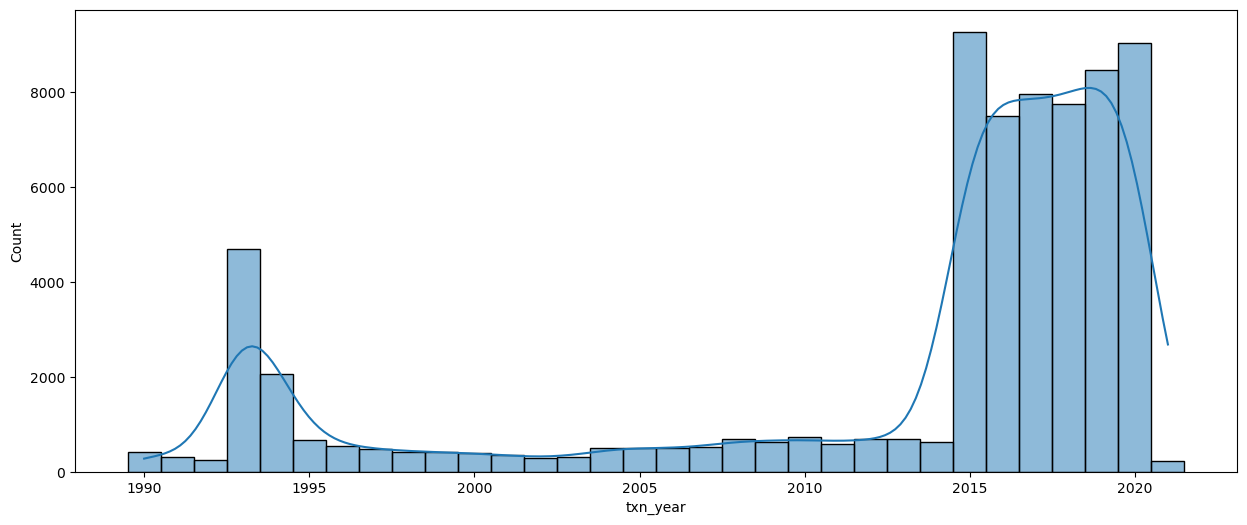

In [8]:
# number of transactions per year
plt.figure(figsize=(15,6))
histplot = sns.histplot(data=df, x='txn_year', kde=True, discrete=True)

In [9]:
# determine the sum of 
data = df.groupby(['Product Code'])['Base Paid Amount'].sum().sort_values(ascending=False)
data

Product Code
MELUNCH                0.00
ABETENDOW_P            0.00
PHDTR_P              -25.00
MINERSGBENDOW        -25.00
IMADLUNCH            -49.00
                    ...    
SMEF_GENERAL    -1161865.53
MII             -1239148.00
SMEF            -1500023.54
PHDTR           -1992289.56
MEC             -2575832.17
Name: Base Paid Amount, Length: 101, dtype: float64

In [10]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [11]:
missing_percentage(df)

,Total,Percent
Ship-To Customer Master Customer ID,0,0.0
Product Code,0,0.0
Base Balance Amount,0,0.0
Base Paid Amount,0,0.0
Base Unit Price Line Total,0,0.0
Order Line Quantity,0,0.0
Product Class,0,0.0
Product Type Code,0,0.0
Product Short Name,0,0.0
Parent Product,0,0.0


In [12]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)
    

In [13]:
percent_value_counts(df,'Product Code')

,Total,Percent
SMEF,47335,69.18
GEM,10110,14.78
MESCH,1930,2.82
MPDSCH,1638,2.39
MEC,1400,2.05
...,...,...
MUDDFUND,1,0.00
WALLACE,1,0.00
COALLUNCH,1,0.00
SHOEMAKERSCH,1,0.00


In [14]:
df = df[(df['txn_year']<=2015)]

In [15]:
missing_percentage(df)

,Total,Percent
Ship-To Customer Master Customer ID,0,0.0
Product Code,0,0.0
Base Balance Amount,0,0.0
Base Paid Amount,0,0.0
Base Unit Price Line Total,0,0.0
Order Line Quantity,0,0.0
Product Class,0,0.0
Product Type Code,0,0.0
Product Short Name,0,0.0
Parent Product,0,0.0


In [16]:
pers = percent_value_counts(df,'Product Code')
pers.to_excel(r'pers.xlsx')

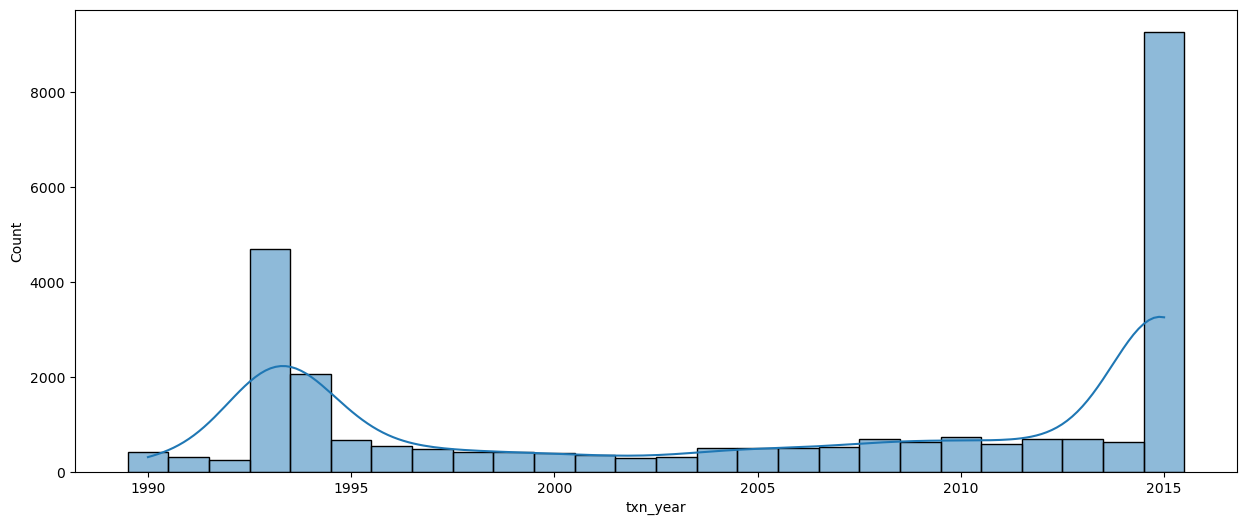

In [17]:
# number of transactions per year
plt.figure(figsize=(15,6))
histplot = sns.histplot(data=df, x='txn_year', kde=True, discrete=True)

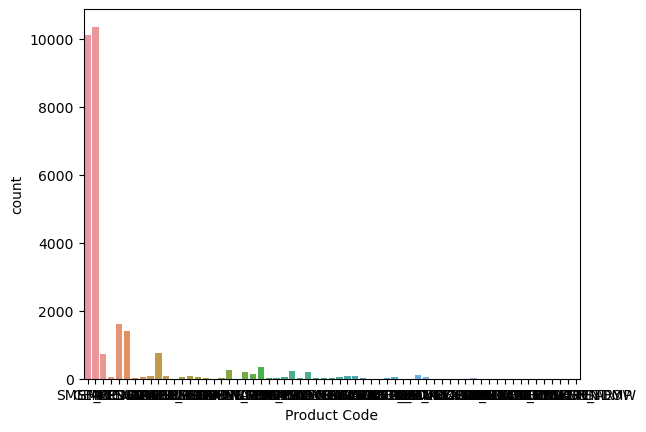

In [19]:
sns.countplot(x='Product Code', data=df)
plt.show()

In [3]:
imis = raw_imis.copy()
list(imis.columns)


['SEQN',
 'ID',
 'ACTIVITY_TYPE',
 'TRANSACTION_DATE',
 'EFFECTIVE_DATE',
 'PRODUCT_CODE',
 'OTHER_CODE',
 'DESCRIPTION',
 'SOURCE_SYSTEM',
 'SOURCE_CODE',
 'QUANTITY',
 'AMOUNT',
 'CATEGORY',
 'UNITS',
 'THRU_DATE',
 'MEMBER_TYPE',
 'ACTION_CODES',
 'PAY_METHOD',
 'TICKLER_DATE',
 'BATCH_NUM',
 'CO_ID',
 'OBJECT',
 'INTENT_TO_EDIT',
 'UF_1',
 'UF_2',
 'UF_3',
 'UF_4',
 'UF_5',
 'UF_6',
 'UF_7',
 'ORIGINATING_TRANS_NUM',
 'ORG_CODE',
 'CAMPAIGN_CODE',
 'OTHER_ID',
 'SOLICITOR_ID',
 'TAXABLE_VALUE',
 'ATTACH_SEQN',
 'ATTACH_TOTAL',
 'RECURRING_REQUEST',
 'STATUS_CODE',
 'NEXT_INSTALL_DATE',
 'GRACE_PERIOD',
 'TIME_STAMP']

In [4]:
imis = imis[['ID',
          'AMOUNT']]

In [5]:
imis = imis.groupby('ID').sum()

In [6]:
imis = imis[(imis['AMOUNT']!=0)]

In [7]:
imis = imis.sort_values(by='AMOUNT',ascending=False)

In [8]:
imis

,AMOUNT
ID,
4160543,999999.00
4164513,993840.52
4050187,750382.80
4158365,740000.00
2502130,601010.00
...,...
4140965,1.00
4140904,1.00
4172285,0.80


In [70]:
pe = raw_pe.copy()

In [71]:
pe.head()

,Ship-To Customer Master Customer ID,Ship-To Customer Label Name,Order Date,Order Number,Order Line Number,Order Line Status Date,Order Line Status Code,Subsystem,Product ID,Parent Product,Product Code,Product Short Name,Product Type Code,Product Class,Order Line Quantity,Base Unit Price Line Total,Base Paid Amount,Base Balance Amount
0,100,Steven K. Aaker,1993-11-12,3000541501,1,1993-11-12 00:00:00.000,A,FND,115351,GEM,GEM,GEM,CASH,GIFT,1,10.0,-10.0,0.0
1,490,Industrial Minerals & Aggregates Division,2020-10-12,4550223039,1,2020-10-12 00:00:00.000,P,FND,120742,PHDTR,PHDTR,Ph.D. Fellowship and Career Development Program,CASH,GIFT,1,2500.0,0.0,2500.0
2,490,Industrial Minerals & Aggregates Division,2020-10-13,4550223099,1,2020-10-13 15:15:11.153,A,FND,120742,PHDTR,PHDTR,Ph.D. Fellowship and Career Development Program,CASH,GIFT,1,2500.0,-2500.0,0.0
3,1400,Thomas R. Abbay,1993-12-21,3000190164,1,1993-12-21 00:00:00.000,A,FND,115351,GEM,GEM,GEM,CASH,GIFT,1,10.0,-10.0,0.0
4,1700,"David M. Abbott, Jr.",1993-10-12,3000469302,1,1993-10-12 00:00:00.000,A,FND,115351,GEM,GEM,GEM,CASH,GIFT,1,10.0,-10.0,0.0


In [72]:
pe = pe[['Ship-To Customer Master Customer ID',
          'Base Unit Price Line Total']]

In [73]:
#pe = pe['Ship-To Customer Master Customer ID'].astype(str)

In [74]:
pe = pe.groupby('Ship-To Customer Master Customer ID').sum()

In [75]:
pe = pe[(pe['Base Unit Price Line Total']!=0)]

In [76]:
pe = pe.sort_values(by='Base Unit Price Line Total',ascending=False)

In [77]:
pe

,Base Unit Price Line Total
Ship-To Customer Master Customer ID,
4050187,1604842.80
4160543,999999.00
4164513,993840.52
2502130,971040.00
4000542,843139.66
...,...
4041290,1.00
4274176,1.00
4172285,0.80


In [31]:
sns.barplot(data = pe, x='Ship-To Customer Master Customer ID', y='Base Unit Price Line Total')

ValueError: Could not interpret input 'Ship-To Customer Master Customer ID'

In [78]:
type(pe['Ship-To Customer Master Customer ID'])

KeyError: 'Ship-To Customer Master Customer ID'

In [92]:
df1 = []
df2 = []

In [33]:
import pandas as pd

# Example data
#list1 = [{'customer_id': 1, 'amount': 100}, {'customer_id': 2, 'amount': 150}, {'customer_id': 3, 'amount': 200}]
#list2 = [{'customer_id': 1, 'amount': 100}, {'customer_id': 2, 'amount': 150}, {'customer_id': 3, 'amount': 250}]

# Convert lists to DataFrames
imis = raw_imis.copy()
pe = raw_pe.copy()

df1 = imis[['ID','AMOUNT']]
df1.columns=['customer_id','amount']
df2 = pe[['Ship-To Customer Master Customer ID','Base Unit Price Line Total']]
df2.columns=['customer_id','amount']
#df1['customer_id'] = imis['ID']
#df1['amount'] = imis['AMOUNT']

#df2['customer_id'] = pe['Ship-To Customer Master Customer ID']
#df2['amount'] = pe['Base Unit Price Line Total']

# Group by customer_id and sum the amount
grouped_df1 = df1.groupby('customer_id').sum().reset_index()
grouped_df2 = df2.groupby('customer_id').sum().reset_index()

# Merge the two DataFrames on customer_id
merged_df = pd.merge(grouped_df1, grouped_df2, on='customer_id', suffixes=('_list1', '_list2'))

# Calculate the difference in amounts
merged_df['amount_difference'] = merged_df['amount_list2'] - merged_df['amount_list1']

#import ace_tools as tools; tools.display_dataframe_to_user(name="Merged DataFrame with Amount Differences", dataframe=merged_df)

print(merged_df)


      customer_id  amount_list1  amount_list2  amount_difference
0             100          10.0          10.0                0.0
1            1400         110.0          10.0             -100.0
2            1700        2510.0          25.0            -2485.0
3            1714          10.0          10.0                0.0
4            1960          25.0          25.0                0.0
...           ...           ...           ...                ...
8041      4203687           0.0           0.0                0.0
8042      4203688           0.0           0.0                0.0
8043      4203693           0.0           0.0                0.0
8044      4203859           0.0           0.0                0.0
8045      4203860           0.0           0.0                0.0

[8046 rows x 4 columns]


In [12]:
merged_df.to_excel(r'merged_df.xlsx')

PermissionError: [Errno 13] Permission denied: 'merged_df.xlsx'

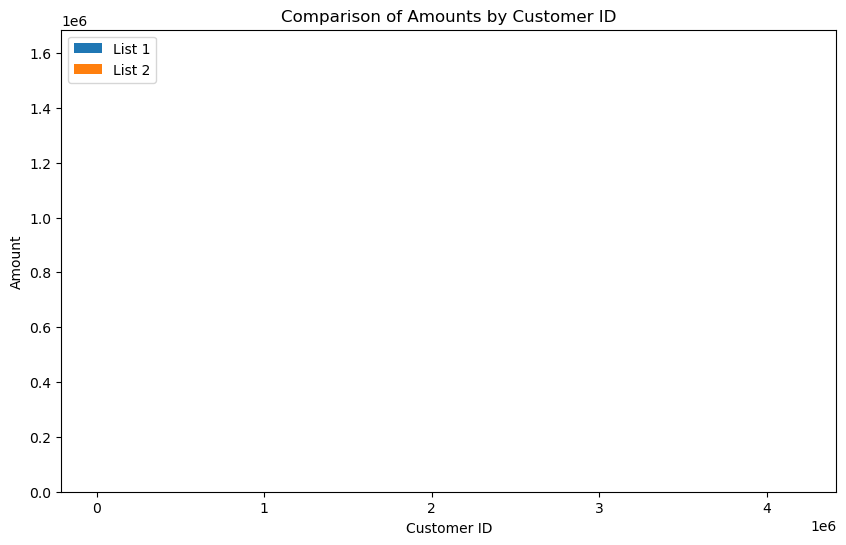

In [7]:
import matplotlib.pyplot as plt

# Bar plot
fig, ax = plt.subplots(figsize=(10, 6))
index = merged_df['customer_id']
bar_width = 0.35

bar1 = ax.bar(index, merged_df['amount_list1'], bar_width, label='List 1')
bar2 = ax.bar(index + bar_width, merged_df['amount_list2'], bar_width, label='List 2')

ax.set_xlabel('Customer ID')
ax.set_ylabel('Amount')
ax.set_title('Comparison of Amounts by Customer ID')
ax.legend()

plt.show()


In [14]:
merged_df = merged_df[merged_df['amount_difference']!=0]

<Axes: xlabel='customer_id', ylabel='amount_difference'>

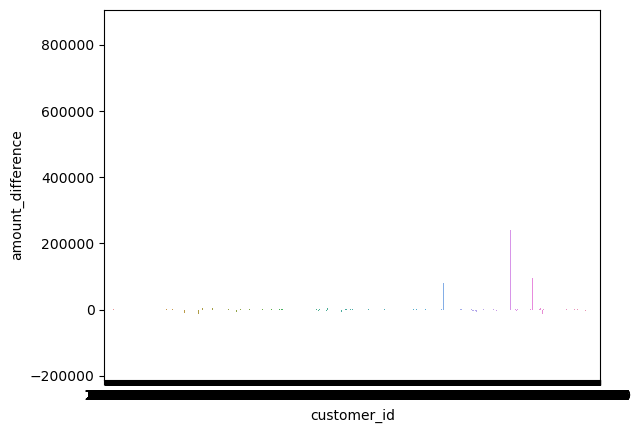

In [15]:
sns.barplot(data=merged_df,x='customer_id',y='amount_difference')

In [17]:
merged_df.describe()

,customer_id,amount_list1,amount_list2,amount_difference
count,2.932000e+03,2932.000000,2.932000e+03,2932.000000
mean,2.411877e+06,3032.906392,3.962104e+03,929.197138
std,1.338645e+06,27961.334428,4.495633e+04,22411.015550
min,1.400000e+03,0.000000,0.000000e+00,-160800.000000
25%,1.259626e+06,20.000000,3.000000e+01,-100.000000
50%,2.458645e+06,110.000000,1.000000e+02,13.000000
75%,4.002236e+06,510.000000,3.500000e+02,55.000000
max,4.201580e+06,750382.800000,1.604843e+06,854460.000000


In [41]:


trim_df = merged_df.copy()
trim_df = trim_df[(trim_df['amount_difference']!=0)]
trim_df = trim_df[(trim_df['amount_difference']>=-5000)&(trim_df['amount_difference']<=5000)]
trim_df.describe()

,customer_id,amount_list1,amount_list2,amount_difference
count,2.821000e+03,2821.000000,2821.000000,2821.000000
mean,2.389325e+06,740.946632,664.695799,-76.250833
std,1.331697e+06,4177.961601,4117.051908,717.282791
min,1.400000e+03,0.000000,0.000000,-5000.000000
25%,1.254700e+06,20.000000,30.000000,-100.000000
50%,2.427400e+06,104.000000,90.000000,15.000000
75%,3.610480e+06,419.000000,288.000000,55.000000
max,4.199869e+06,128590.500000,125590.500000,5000.000000


<Axes: xlabel='amount_difference', ylabel='Count'>

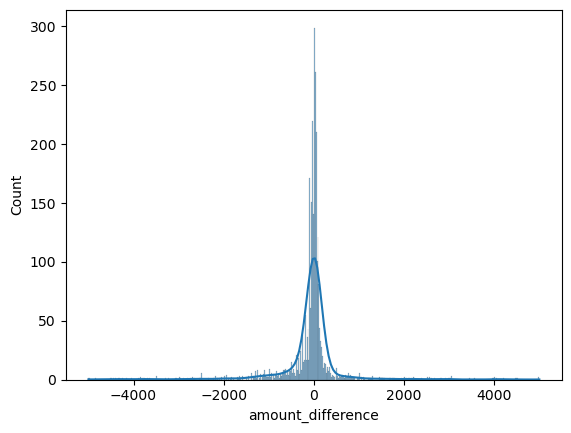

In [45]:
sns.histplot(data=trim_df,x='amount_difference',bins=500,kde=True)

# Notes

In [15]:
imis = raw_imis.copy()
pe = raw_pe.copy()

In [16]:
columns = ['customer_id','date','amount','category']

In [17]:
list(imis.columns)

['SEQN',
 'ID',
 'ACTIVITY_TYPE',
 'TRANSACTION_DATE',
 'EFFECTIVE_DATE',
 'PRODUCT_CODE',
 'OTHER_CODE',
 'DESCRIPTION',
 'SOURCE_SYSTEM',
 'SOURCE_CODE',
 'QUANTITY',
 'AMOUNT',
 'CATEGORY',
 'UNITS',
 'THRU_DATE',
 'MEMBER_TYPE',
 'ACTION_CODES',
 'PAY_METHOD',
 'TICKLER_DATE',
 'BATCH_NUM',
 'CO_ID',
 'OBJECT',
 'INTENT_TO_EDIT',
 'UF_1',
 'UF_2',
 'UF_3',
 'UF_4',
 'UF_5',
 'UF_6',
 'UF_7',
 'ORIGINATING_TRANS_NUM',
 'ORG_CODE',
 'CAMPAIGN_CODE',
 'OTHER_ID',
 'SOLICITOR_ID',
 'TAXABLE_VALUE',
 'ATTACH_SEQN',
 'ATTACH_TOTAL',
 'RECURRING_REQUEST',
 'STATUS_CODE',
 'NEXT_INSTALL_DATE',
 'GRACE_PERIOD',
 'TIME_STAMP']

In [18]:
list(pe.columns)

['Ship-To Customer Master Customer ID',
 'Ship-To Customer Label Name',
 'Order Date',
 'Order Number',
 'Order Line Number',
 'Order Line Status Date',
 'Order Line Status Code',
 'Subsystem',
 'Product ID',
 'Parent Product',
 'Product Code',
 'Product Short Name',
 'Product Type Code',
 'Product Class',
 'Order Line Quantity',
 'Base Unit Price Line Total',
 'Base Paid Amount',
 'Base Balance Amount']

In [30]:
df1 = imis[['ID',
            'TRANSACTION_DATE',
            'AMOUNT',
            'PRODUCT_CODE']]
df2 = pe[['Ship-To Customer Master Customer ID',
          'Order Date',
          'Base Unit Price Line Total',
          'Product Code',]]


In [26]:
df1.columns = columns
df2.columns = columns

In [27]:
columns

['customer_id', 'date', 'amount', 'category']

In [28]:
import pandas as pd

# Transaction DataFrame 1
txns_df1 = df1

# Transaction DataFrame 2
txns_df2 = df2

# Merge the dataframes on 'CustomerID' and 'Date'
merged_txns = pd.merge(txns_df1, txns_df2, on=['customer_id', 'date'], suffixes=('_df1', '_df2'))
print("Merged Transactions DataFrame:")
print(merged_txns)

# Check if 'Amount' columns are equal
amounts_equal = (merged_txns['amount_df1'] == merged_txns['amount_df2']).all()
print("\nAmounts Equal:", amounts_equal)

# Prepare data for comparison
# Selecting and renaming columns to have identical labels for comparison
categories_df1 = merged_txns[['customer_id', 'date', 'category_df1']].rename(columns={'category_df1': 'category'})
categories_df2 = merged_txns[['customer_id', 'date', 'category_df2']].rename(columns={'category_df2': 'category'})

# Set indexes for comparison
categories_df1 = categories_df1.set_index(['customer_id', 'date'])
categories_df2 = categories_df2.set_index(['customer_id', 'date'])

# Perform the comparison
category_comparison = categories_df1.compare(categories_df2)
print("\nCategory Comparison:")
print(category_comparison)


Merged Transactions DataFrame:
       customer_id       date  amount_df1 category_df1  amount_df2  \
0          1006400 2008-09-22       100.0    INDMINSCH      -100.0   
1          1024200 2007-09-05        75.0          GEM       -75.0   
2          1041000 2007-10-18        20.0       MMPSCH       -20.0   
3          1041000 2008-09-22        25.0       MMPSCH       -25.0   
4          1063900 2008-11-18        45.0       MMPSCH       -45.0   
...            ...        ...         ...          ...         ...   
43465       999940 2005-10-17        50.0       MMPSCH       -50.0   
43466       999940 1992-01-23        50.0       MMPSCH       -50.0   
43467       999940 1999-10-25        50.0       MMPSCH       -50.0   
43468       999940 2000-10-25        50.0       MMPSCH       -50.0   
43469       999950 1993-11-04        10.0          GEM       -10.0   

      category_df2  
0        INDMINSCH  
1              GEM  
2           MMPSCH  
3           MMPSCH  
4           MMPSCH  
..

In [29]:
merged_txns.to_excel(r'merged_txn.xlsx')